<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/PDI_atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LISTA 6

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter
import heapq
import os
import imageio

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/PDI/atividade_6'
dataset_compressed = '/content/drive/MyDrive/PDI/atividade_6/results'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##RLE

Utilizamos do RLE (RUN LENGTH ENCODER) para fazer a compressão das imagens

In [ ]:
def rle_compress(image):
    compressed_data = []
    count = 1
    height, width = image.shape[:2]

    for i in range(1, height):
        for j in range(1, width):
            if np.array_equal(image[i, j], image[i, j - 1]):
                count += 1
            else:
                compressed_data.append((image[i, j - 1], count))
                count = 1
        compressed_data.append((image[i, -1], count))
        count = 1

    return compressed_data

def linear_difference_compress(image):
    diff_image = np.diff(image, axis=1)
    compressed_data = rle_compress(diff_image)

    return compressed_data

def rle_decompress(compressed_data):
    decompressed_data = []
    for pixel, count in compressed_data:
        decompressed_data.extend([pixel] * count)
    return np.array(decompressed_data)

###Calcular Redundancia e Taxa de Compressão

In [ ]:
def calculate_redundancy(imagem_original,compressed):
    tamanho_original = imagem_original.size
    tamanho_comprimido = len(compressed)
    redundancia_relativa = (tamanho_comprimido - tamanho_original) / tamanho_original * 100
    return round(redundancia_relativa,2)

In [ ]:
def calculate_compression_ratio(image, compressed_data):
    compression_ratio = image.size / len(compressed_data)
    return round(compression_ratio,2)

###Plotar Histogramas e Imagens

In [ ]:
def plot_imagens_histogramas(imagem1, imagem2):
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    # Plot da primeira imagem
    axes[0, 0].imshow(imagem1, cmap='gray')
    axes[0, 0].set_title('Imagem Original')
    axes[0, 0].axis('off')

    # Plot do histograma da primeira imagem
    hist1, bins1, _ = axes[0, 1].hist(imagem1.flatten(), bins=256, color='blue', alpha=0.7)
    axes[0, 1].set_title('Histograma da Imagem Original')
    axes[0, 1].set_xlim([0, 255])
    axes[0, 1].set_ylim([0, np.max(hist1)])

    # Plot da segunda imagem
    axes[1, 0].imshow(imagem2, cmap='gray')
    axes[1, 0].set_title('Resultado')
    axes[1, 0].axis('off')

    # Plot do histograma da segunda imagem
    hist2, bins2, _ = axes[1, 1].hist(imagem2.flatten(), bins=256, color='blue', alpha=0.7)
    axes[1, 1].set_title('Histograma da Compressão - RLE')
    axes[1, 1].set_xlim([0, 255])
    axes[1, 1].set_ylim([0, np.max(hist2)])

    plt.tight_layout()
    plt.show()

##Carrega Imagens

In [ ]:
imagem_1 = plt.imread("/content/drive/MyDrive/PDI/atividade_6/image_1.tif")
imagem_2 = plt.imread("/content/drive/MyDrive/PDI/atividade_6/image_2.tif")
imagem_3 = plt.imread("/content/drive/MyDrive/PDI/atividade_6/image_3.tif")
imagem_4 = plt.imread("/content/drive/MyDrive/PDI/atividade_6/image_4.tif")
imagem_5 = plt.imread("/content/drive/MyDrive/PDI/atividade_6/image_5.tif")
imagem_6 = plt.imread("/content/drive/MyDrive/PDI/atividade_6/image_6.tif")

##image_1.tif

Imagem: image_1.tif
Redundância relativa: -82.9
Taxa de compressão: 5.85
---------------------------


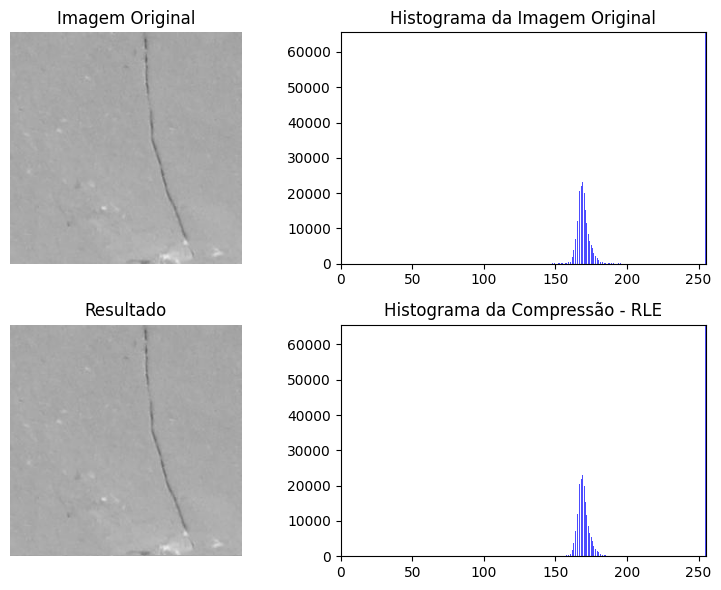

In [ ]:
compressed_data = rle_compress(imagem_1)

decompressed_data = rle_decompress(compressed_data)
decompressed_data = np.resize(decompressed_data,imagem_1.shape)

image_pil = Image.fromarray(decompressed_data)

image_pil.save("/content/drive/MyDrive/PDI/atividade_6/results/image_1.tif", format='TIFF')

redundancy = calculate_redundancy(imagem_1,compressed_data)
ratio = calculate_compression_ratio(imagem_1,compressed_data)

print("Imagem: image_1.tif")
print('Redundância relativa:', redundancy)
print('Taxa de compressão:', ratio)
print("---------------------------")

plot_imagens_histogramas(imagem_1, decompressed_data)

##image_2.tif

Imagem: image_2.tif
Redundância relativa: -82.71
Taxa de compressão: 5.78
---------------------------


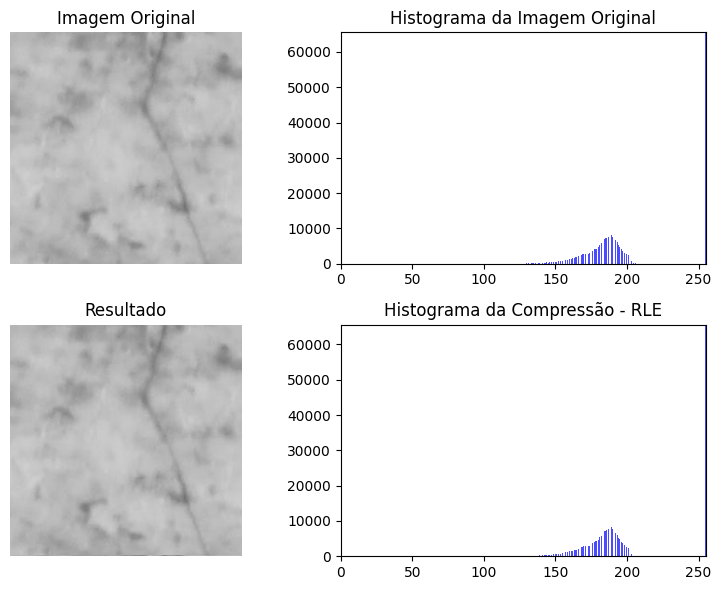

In [ ]:
compressed_data = rle_compress(imagem_2)
decompressed_data = rle_decompress(compressed_data)
decompressed_data = np.resize(decompressed_data,imagem_2.shape)

redundancy = calculate_redundancy(imagem_2,compressed_data)
ratio = calculate_compression_ratio(imagem_2,compressed_data)

image_pil = Image.fromarray(decompressed_data)

image_pil.save("/content/drive/MyDrive/PDI/atividade_6/results/image_2.tif", format='TIFF')

print("Imagem: image_2.tif")
print('Redundância relativa:', redundancy)
print('Taxa de compressão:', ratio)
print("---------------------------")

plot_imagens_histogramas(imagem_2, decompressed_data)

##image_3.tif

Imagem: image_3.tif
Redundância relativa: -82.86
Taxa de compressão: 5.83
---------------------------


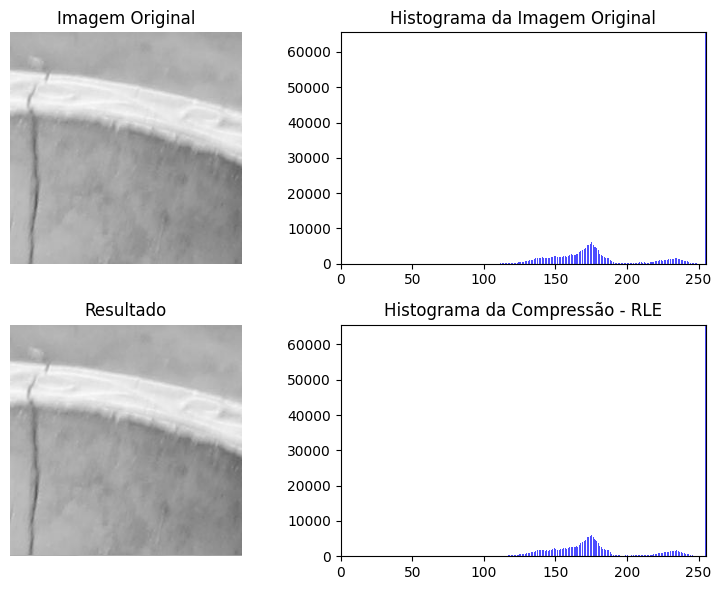

In [ ]:
compressed_data = rle_compress(imagem_3)
decompressed_data = rle_decompress(compressed_data)
decompressed_data = np.resize(decompressed_data,imagem_3.shape)

redundancy = calculate_redundancy(imagem_3,compressed_data)
ratio = calculate_compression_ratio(imagem_3,compressed_data)

image_pil = Image.fromarray(decompressed_data)

image_pil.save("/content/drive/MyDrive/PDI/atividade_6/results/image_3.tif", format='TIFF')

print("Imagem: image_3.tif")
print('Redundância relativa:', redundancy)
print('Taxa de compressão:', ratio)
print("---------------------------")

plot_imagens_histogramas(imagem_3, decompressed_data)

##image_4.tif

Imagem: image_4.tif
Redundância relativa: -84.01
Taxa de compressão: 6.25
---------------------------


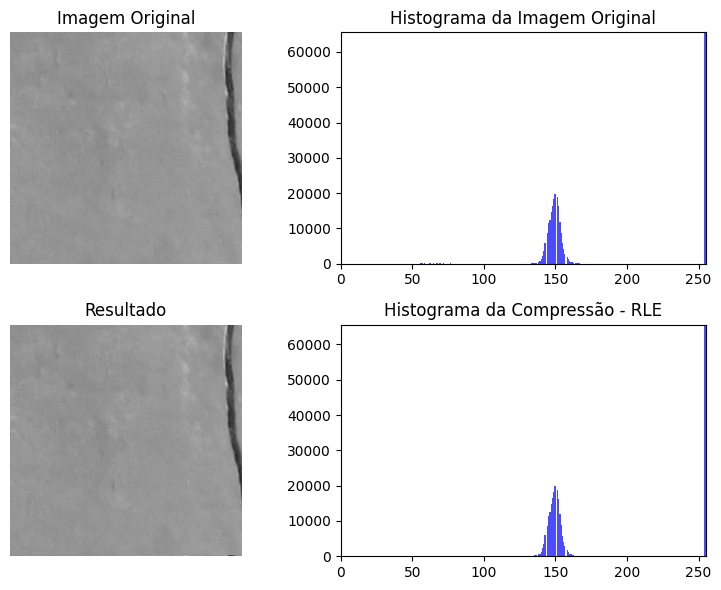

In [ ]:
compressed_data = rle_compress(imagem_4)
decompressed_data = rle_decompress(compressed_data)
decompressed_data = np.resize(decompressed_data,imagem_4.shape)

redundancy = calculate_redundancy(imagem_4,compressed_data)
ratio = calculate_compression_ratio(imagem_4,compressed_data)

image_pil = Image.fromarray(decompressed_data)

image_pil.save("/content/drive/MyDrive/PDI/atividade_6/results/image_4.tif", format='TIFF')

print("Imagem: image_4.tif")
print('Redundância relativa:', redundancy)
print('Taxa de compressão:', ratio)
print("---------------------------")

plot_imagens_histogramas(imagem_4, decompressed_data)

##image_5.tif

Imagem: image_5.tif
Redundância relativa: -85.08
Taxa de compressão: 6.7
---------------------------


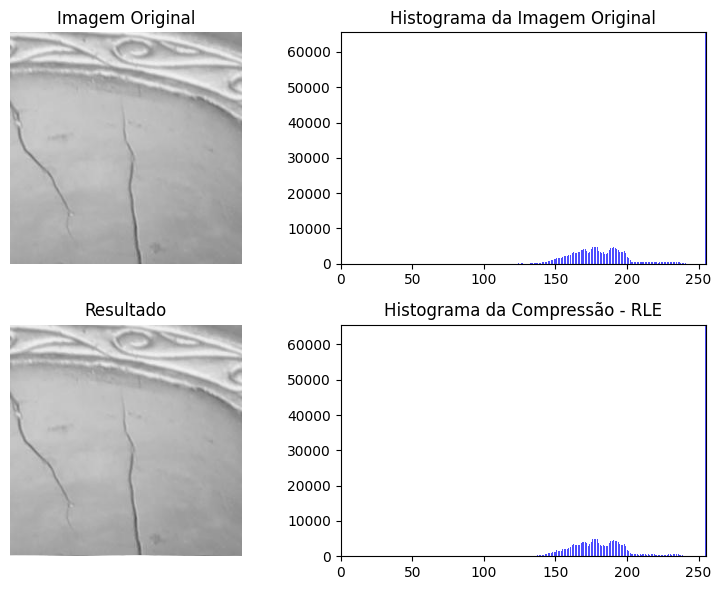

In [ ]:
compressed_data = rle_compress(imagem_5)
decompressed_data = rle_decompress(compressed_data)
decompressed_data = np.resize(decompressed_data,imagem_5.shape)

redundancy = calculate_redundancy(imagem_5,compressed_data)
ratio = calculate_compression_ratio(imagem_5,compressed_data)

image_pil = Image.fromarray(decompressed_data)

image_pil.save("/content/drive/MyDrive/PDI/atividade_6/results/image_5.tif", format='TIFF')

print("Imagem: image_5.tif")
print('Redundância relativa:', redundancy)
print('Taxa de compressão:', ratio)
print("---------------------------")

plot_imagens_histogramas(imagem_5, decompressed_data)

##image_6.tif

Imagem: image_6.tif
Redundância relativa: -79.99
Taxa de compressão: 5.0
---------------------------


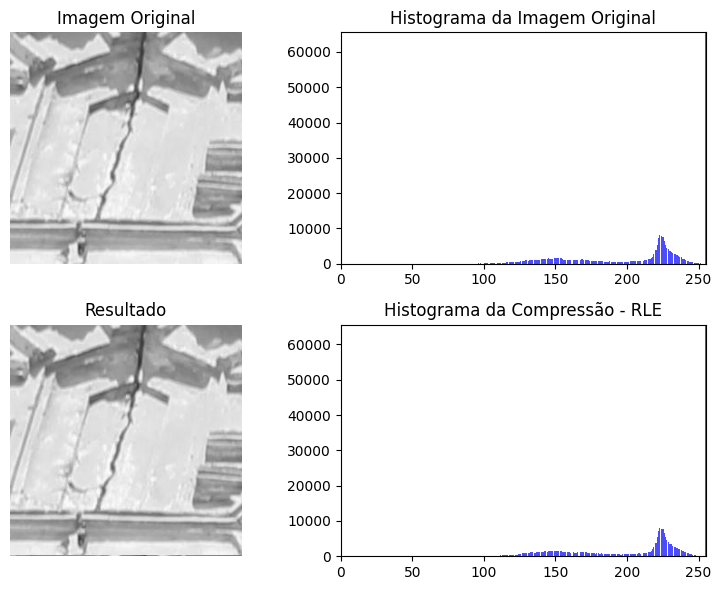

In [ ]:
compressed_data = rle_compress(imagem_6)
decompressed_data = rle_decompress(compressed_data)
decompressed_data = np.resize(decompressed_data,imagem_6.shape)

redundancy = calculate_redundancy(imagem_6,compressed_data)
ratio = calculate_compression_ratio(imagem_6,compressed_data)

image_pil = Image.fromarray(decompressed_data)

image_pil.save("/content/drive/MyDrive/PDI/atividade_6/results/image_6.tif", format='TIFF')

print("Imagem: image_6.tif")
print('Redundância relativa:', redundancy)
print('Taxa de compressão:', ratio)
print("---------------------------")

plot_imagens_histogramas(imagem_6, decompressed_data)